EXPLORATORY DATA ANALYSIS

LIFECYCLE OF MACHINE LEARNING PROJECT:
- Understanding the Probelm Statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis
- Model Training
- Choose Best Model

Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('D:\\ml_project\\notebook\\data\\studs.csv.csv')

Key point about Dataset
- Gender: Optimistically just male and female
- Race/ Ethinicity (A, B, C, D, E)
- Parent Level Education (Final Level Education- Bachelor, Masters, pHD, high school, 4th Fail, 10th Pass)
- test preparation course
- lunch
- math score
- writing score 

Key Methods to be applied - Feature Extraction, PCA and Feature Selection

Data Checks to perform:
- Check missing values
- Check Duplicates
- Check Datatype
- Check the number of unique values of each column
- Check Statistics
- Check Various Categories

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))



We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding columns for "Total Score" and "Average"

In [13]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full =  df[df['reading score'] == 100]['average'].count()
writing_full =  df[df['writing score'] == 100]['average'].count()
math_full =  df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths:  {math_full}')
print(f'Number of students with full marks in Writing:  {writing_full}')
print(f'Number of students with full marks in Reading:  {reading_full}')


Number of students with full marks in Maths:  7
Number of students with full marks in Writing:  14
Number of students with full marks in Reading:  17


In [15]:
reading_less_20 =  df[df['reading score'] <= 20]['average'].count()
writing_less_20 =  df[df['writing score'] <= 20]['average'].count()
math_less_20 =  df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths:  {math_less_20}')
print(f'Number of students with less than 20 marks in Writing:  {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading:  {reading_less_20}')


Number of students with less than 20 marks in Maths:  4
Number of students with less than 20 marks in Writing:  3
Number of students with less than 20 marks in Reading:  1


Data Visualization

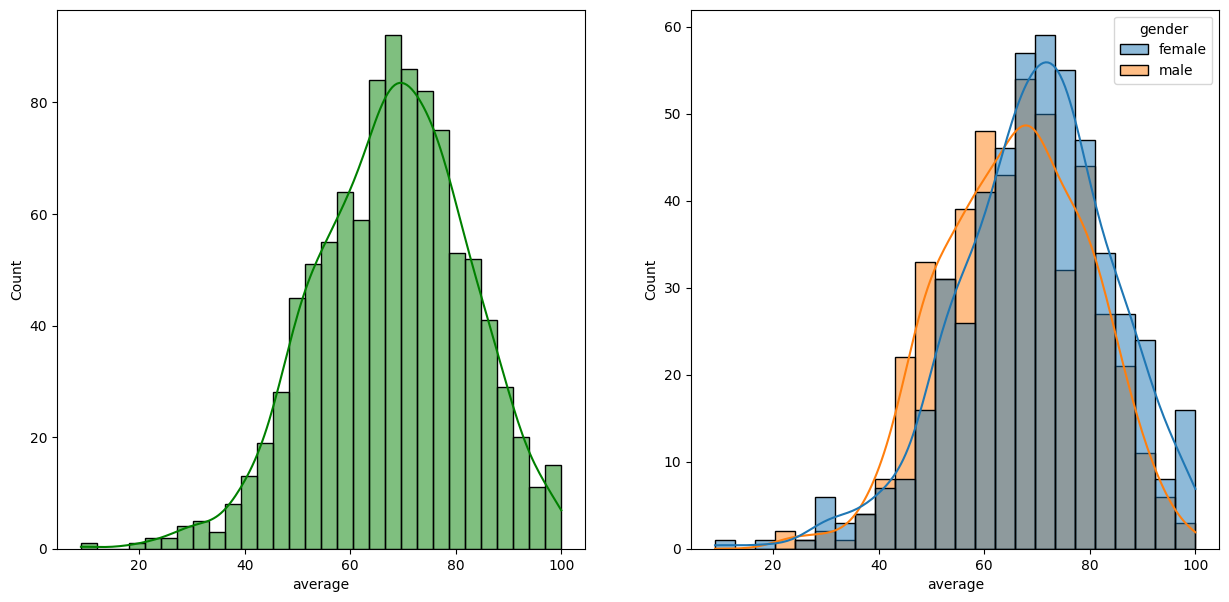

In [16]:
fig, axis = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='average', kde=True, hue='gender')

plt.show()


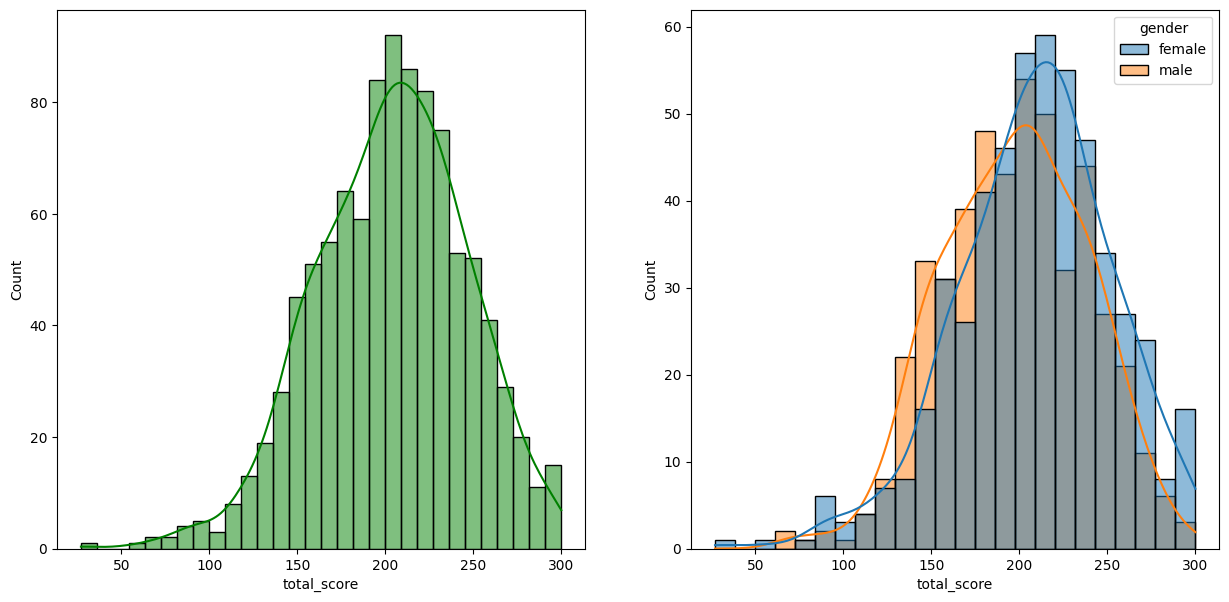

In [17]:
fig, axis = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')

plt.show()


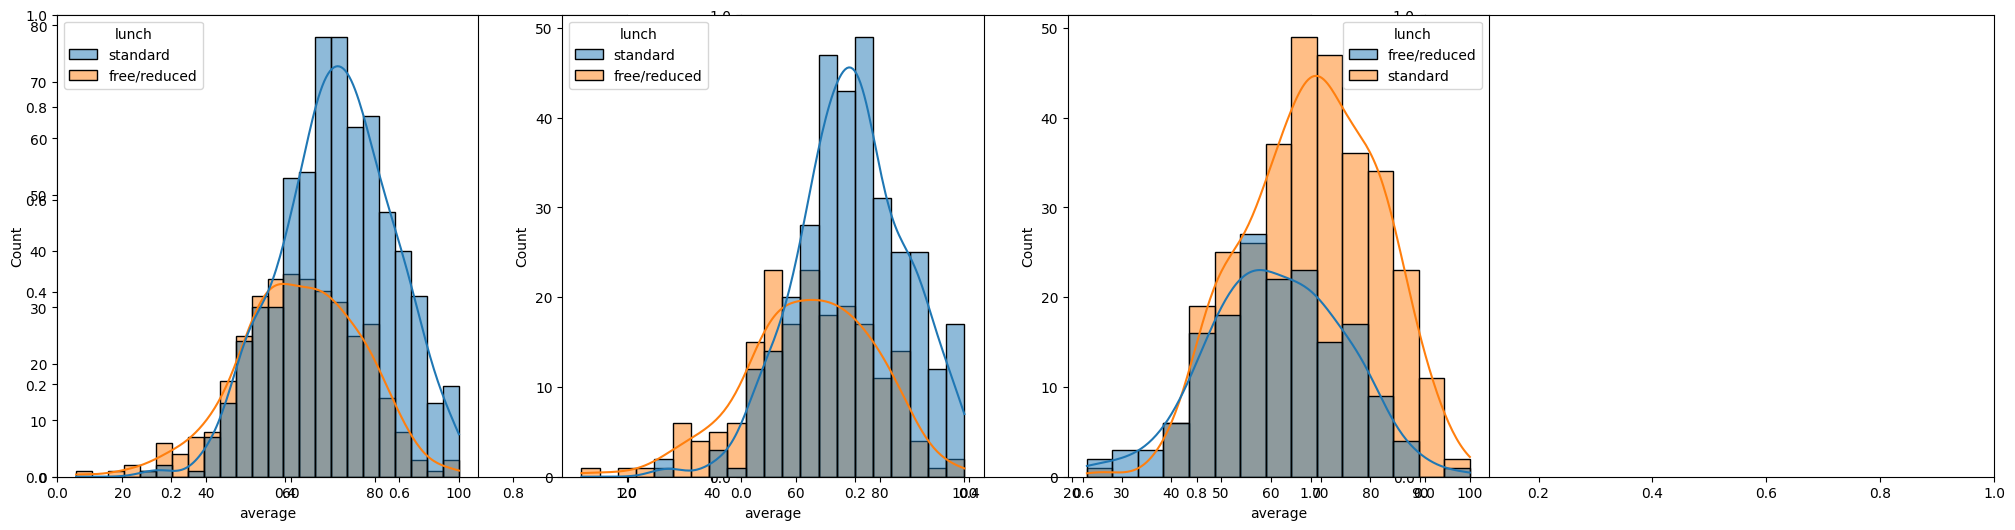

In [18]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(1, 4, 1)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(1, 4, 2)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(1, 4, 3)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings

In [20]:
from sklearn.metrics import r2_score

In [21]:
X = df.drop(columns = ['math score'], axis = 1)

In [22]:
y = df['math score']

In [26]:
#Creating a pipeline for tranformation of data
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocesor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)
X = preprocesor.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape

((800, 21), (200, 21))

In [38]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

# Initialize lists to store model names and R² scores
model_list = []
r2_train_list = []
r2_test_list = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Append the model name and R² scores to the lists
    model_list.append(name)
    r2_train_list.append(model_train_r2)
    r2_test_list.append(model_test_r2)

    # Print model performance
    print(f'Model: {name}')
    print('Model Performance for Training Set')
    print(f'- Root Mean Squared Error : {model_train_rmse:.4f}')
    print(f'- Mean Absolute Error : {model_train_mae:.4f}')
    print(f'- R2 Score : {model_train_r2:.4f}')
    print('-------------------------------------------------------------------')
    print('Model Performance for Test Set')
    print(f'- Root Mean Squared Error : {model_test_rmse:.4f}')
    print(f'- Mean Absolute Error : {model_test_mae:.4f}')
    print(f'- R2 Score : {model_test_r2:.4f}')
    print('='*35)
    print('\n')

# Create a DataFrame from the collected data
df_model_performance = pd.DataFrame({
    'Model Name': model_list,
    'Training R2 Score': r2_train_list,
    'Test R2 Score': r2_test_list
})

# Display the DataFrame
print(df_model_performance)


Model: Linear Regression
Model Performance for Training Set
- Root Mean Squared Error : 0.0000
- Mean Absolute Error : 0.0000
- R2 Score : 1.0000
-------------------------------------------------------------------
Model Performance for Test Set
- Root Mean Squared Error : 0.0000
- Mean Absolute Error : 0.0000
- R2 Score : 1.0000


Model: Lasso
Model Performance for Training Set
- Root Mean Squared Error : 4.7381
- Mean Absolute Error : 3.7439
- R2 Score : 0.9004
-------------------------------------------------------------------
Model Performance for Test Set
- Root Mean Squared Error : 4.7171
- Mean Absolute Error : 3.7579
- R2 Score : 0.9086


Model: Ridge
Model Performance for Training Set
- Root Mean Squared Error : 0.3396
- Mean Absolute Error : 0.2724
- R2 Score : 0.9995
-------------------------------------------------------------------
Model Performance for Test Set
- Root Mean Squared Error : 0.3432
- Mean Absolute Error : 0.2684
- R2 Score : 0.9995


Model: K-Neighbors Regres

In [39]:
lin_model = LinearRegression(fit_intercept=True)
lin_model =lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print('Accuracy of the model is %.2f'%score)

Accuracy of the model is 100.00


Text(0, 0.5, 'Predicted')

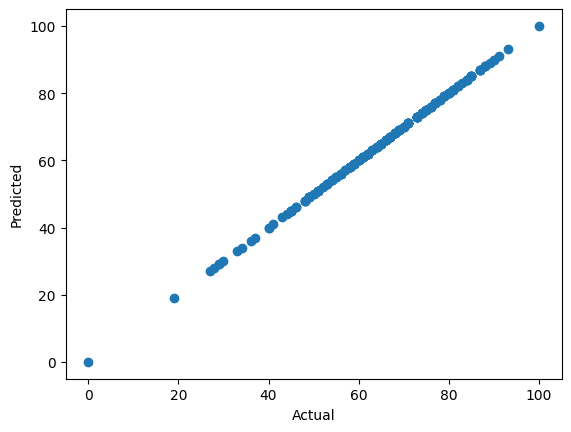

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

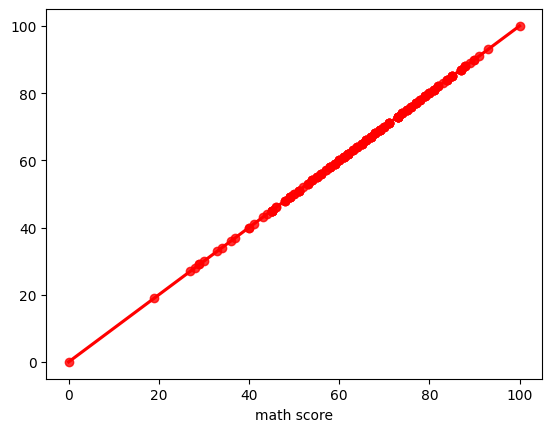

In [41]:
sns.regplot(x =y_test, y = y_pred, ci = None, color = 'red')